In [650]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

## Step 1. Open the data file and study the general information
### Project description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

In [651]:
calls_df = pd.read_csv('./datasets/moved_megaline_calls.csv')
internet_df = pd.read_csv('./datasets/moved_megaline_internet.csv')
messages_df = pd.read_csv('./datasets/moved_megaline_messages.csv')
plans_df = pd.read_csv('./datasets/moved_megaline_plans.csv')
users_df = pd.read_csv('./datasets/moved_megaline_users.csv')


## Step 2. Prepare the data

## Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

### Calls

In [652]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
calls_df['duration'] = np.ceil(calls_df['duration'])

calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [653]:
calls_df['month'] = calls_df['call_date'].dt.month

calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='count')
calls_by_user_per_month = calls_by_user_per_month.reindex(users_df['user_id'].unique())

calls_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,49.0,65.0,64.0,56.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,55.0,47.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0
1004,NaN,NaN,NaN,NaN,21.0,44.0,49.0,49.0,42.0,61.0,54.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.0,61.0,65.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,52.0,46.0,39.0,40.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0


In [654]:
duration_of_calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='sum', fill_value=0)
duration_of_calls_by_user_per_month = duration_of_calls_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

duration_of_calls_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,302,610,361,492
1496,0,0,0,0,0,0,0,122,414,317,308,294
1497,0,0,0,0,0,0,0,0,0,0,0,300


### Internet

In [655]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month

internet_df.info()
internet_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,month
102423,1490_238,1490,2018-10-15,373.01,10
12472,1060_181,1060,2018-09-14,875.38,9
91959,1426_53,1426,2018-12-29,627.48,12
42208,1187_385,1187,2018-09-20,132.80,9
64201,1294_122,1294,2018-10-29,397.70,10


In [656]:
internet_by_user_per_month = internet_df.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')
internet_by_user_per_month = internet_by_user_per_month.reindex(users_df['user_id'].unique())

internet_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6919.15,13314.82,22330.49,18504.30,19369.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6552.01,19345.08,14396.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27044.14
1004,NaN,NaN,NaN,NaN,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22981.37,26899.41,24912.78,24097.40
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.66,16389.27,14287.36,8547.36,16438.99
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11106.55


### Messages

In [657]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

messages_df.info()
messages_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25


In [658]:
messages_by_user_per_month = messages_df
messages_by_user_per_month['month'] = messages_df['message_date'].dt.month
messages_by_user_per_month = messages_by_user_per_month.pivot_table(index='user_id', columns='month', values='message_date', aggfunc='count')
messages_by_user_per_month = messages_by_user_per_month.reindex(users_df['user_id'].unique())

messages_by_user_per_month.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,139.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,47.0,59.0,48.0,50.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,37.0,26.0


### Plans

In [659]:
plans_df['plan_name'] = plans_df['plan_name'].astype('category')

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users

In [660]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['plan'] = users_df['plan'].astype('category')
users_df.set_index('user_id', inplace=True, drop=False)

users_df.info()
users_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 31.9+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
user_id,,,,,,,,
1361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaT
1073,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaT
1374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaT
1155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaT
1104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaT


# Monthly user revenue
Now let's calculate monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [717]:

max_month = 13
months = range(1, max_month)

monthly_user_revenue = pd.DataFrame(index=users_df.index, columns=months)
# monthly_user_revenue.fillna(0, inplace=True)
monthly_user_revenue[['user_id', 'plan', 'churn_date']] = users_df[['user_id', 'plan', 'churn_date']]

monthly_user_revenue = monthly_user_revenue.merge(plans_df, left_on='plan', right_on='plan_name', how='left')
monthly_user_revenue.set_index('user_id', inplace=True, drop=False)

for month in months:
    monthly_user_revenue[month] = ((duration_of_calls_by_user_per_month[month] - monthly_user_revenue['minutes_included']).clip(lower=0)) * monthly_user_revenue['usd_per_minute']
    monthly_user_revenue[month] += ((messages_by_user_per_month[month] - monthly_user_revenue['messages_included']).clip(lower=0)) * monthly_user_revenue['usd_per_message']
    monthly_user_revenue[month] += np.ceil((internet_by_user_per_month[month] - monthly_user_revenue['mb_per_month_included']).clip(lower=0) / 1024) * monthly_user_revenue['usd_per_gb']
    monthly_user_revenue[month] += monthly_user_revenue['usd_monthly_pay']

churned_users = monthly_user_revenue.query('not churn_date.isnull()')

# we assume that we don't get money from users who have already left
for user_id in churned_users.index:
    for month in range(churned_users.loc[user_id, 'churn_date'].month + 1, max_month):
        monthly_user_revenue.loc[user_id, month] = np.nan

        

monthly_user_revenue

,1,2,3,4,5,6,7,8,9,10,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
user_id,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,90.09,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1004,NaN,NaN,NaN,NaN,20.0,80.0,110.0,150.0,60.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,40.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate


# Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

In [718]:
for plan in monthly_user_revenue['plan'].unique():
    plan_users = monthly_user_revenue.query('plan == @plan')
    print(f"{len(plan_users)} users have {plan} plan")

161 users have ultimate plan
339 users have surf plan


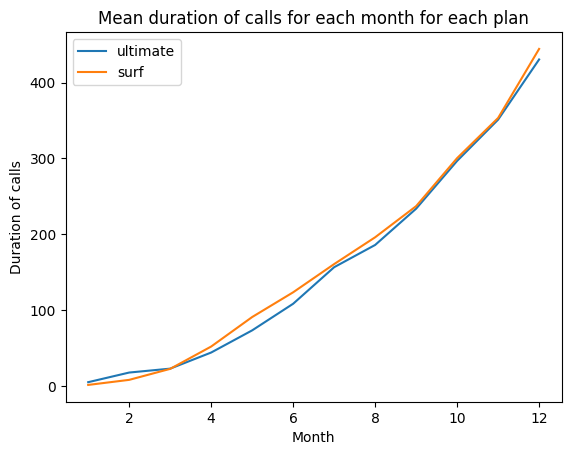

In [719]:
duration_of_calls_by_user_per_month['plan'] = users_df['plan']


#plot mean duration of calls for each month for each plan
for plan in duration_of_calls_by_user_per_month['plan'].unique():
    df = duration_of_calls_by_user_per_month.query('plan == @plan')[months]
    plt.plot(months, df.mean(), label=plan)

plt.legend()
plt.title('Mean duration of calls for each month for each plan')
plt.xlabel('Month')
plt.ylabel('Duration of calls')
plt.show()

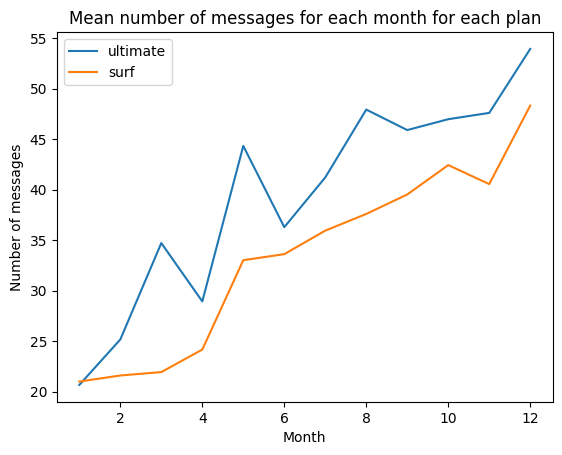

In [720]:
messages_by_user_per_month['plan'] = users_df['plan']

#plot mean number of messages for each month for each plan
for plan in messages_by_user_per_month['plan'].unique():
    df = messages_by_user_per_month.query('plan == @plan')[months]
    plt.plot(months, df.mean(), label=plan)

plt.legend()
plt.title('Mean number of messages for each month for each plan')
plt.xlabel('Month')
plt.ylabel('Number of messages')
plt.show()

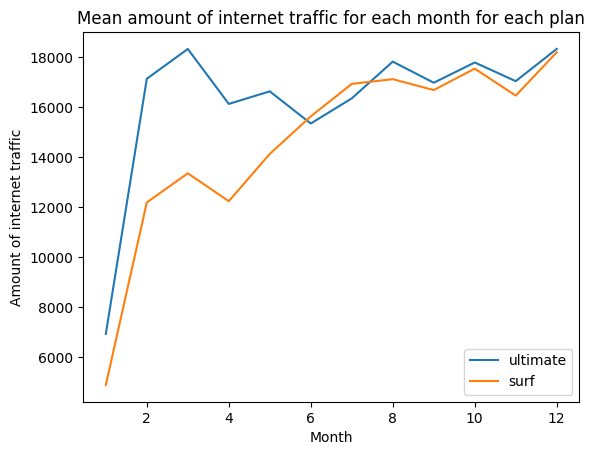

In [721]:
internet_by_user_per_month['plan'] = users_df['plan']

#plot mean amount of internet traffic for each month for each plan
for plan in internet_by_user_per_month['plan'].unique():
    df = internet_by_user_per_month.query('plan == @plan')[months]
    plt.plot(months, df.mean(), label=plan)

plt.legend()
plt.title('Mean amount of internet traffic for each month for each plan')
plt.xlabel('Month')
plt.ylabel('Amount of internet traffic')
plt.show()


## Mean yearly revenue per user

Mean ultimate spending =  71.82190170940171
Std ultimate spending =  7.182455952415068
Mean surf spending =  58.51144399619866
Std surf spending =  43.6292744597576


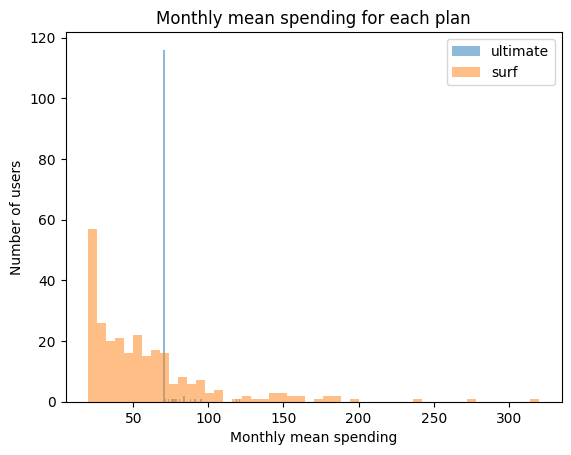

In [727]:
monthly_user_revenue['avg_month'] = monthly_user_revenue[months].mean(axis=1)

for plan in monthly_user_revenue['plan'].unique():
    df = monthly_user_revenue.query('plan == @plan')
    print(f"Mean {plan} spending = ", df['avg_month'].mean())
    print(f"Std {plan} spending = ", np.std(df['avg_month']))
    plt.hist(df['avg_month'], bins=50, alpha=0.5, label=plan)

plt.legend()
plt.title('Monthly mean spending for each plan')
plt.xlabel('Monthly mean spending')
plt.ylabel('Number of users')
plt.show()



# Step 4. Test the hypotheses
## The average revenue from users of Ultimate and Surf calling plans differs.
Earlier we saw that user consumption grows from month to month for some reason. But the values are pretty much the same.

Let's take data from december and test the hypothesis that the average revenue from users of Ultimate and Surf calling plans differs.

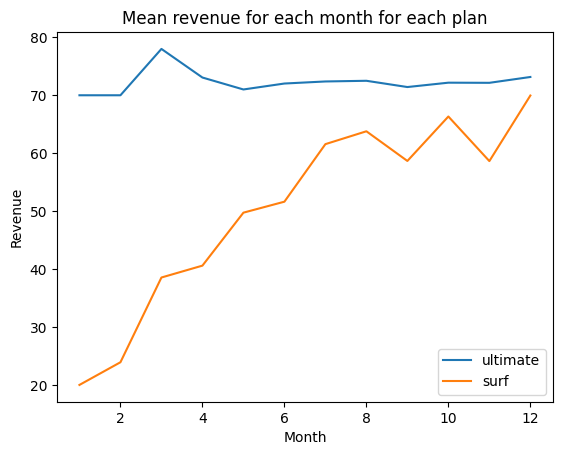

In [723]:
# plot mean revenue for each month for each plan
for plan in monthly_user_revenue['plan'].unique():
    df = monthly_user_revenue.query('plan == @plan')[months]
    plt.plot( months, df.mean(), label=plan)

plt.legend()
plt.title('Mean revenue for each month for each plan')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


In [729]:

# Our null hypothesis is that the average revenue from users of Ultimate plan is equal to the average revenue from users of Surf plan
avg_month_revenue_alpha = 0.05

avg_surf_month_revenue = monthly_user_revenue.query('plan == "surf"')['avg_month']
avg_ultimate_month_revenue = monthly_user_revenue.query('plan == "ultimate"')['avg_month']

results = st.ttest_ind(avg_surf_month_revenue, avg_ultimate_month_revenue, equal_var=False, nan_policy='omit')

results.pvalue

if results.pvalue < avg_month_revenue_alpha:
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

We reject the null hypothesis


We reject the hypothesis that the average revenue from users of Ultimate and Surf calling plans is equal to each other


## The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [741]:
monthly_user_revenue['city'] = users_df['city']

# Our null hypothesis is that the average revenue from users from NY-NJ area is equal to the average revenue from users from other regions
monthly_nynj_revenue = monthly_user_revenue.query('city.str.contains("NY-NJ")')['avg_month']
monthly_not_nynj_revenue = monthly_user_revenue.query('not city.str.contains("NY-NJ")')['avg_month']

print("monthly_nynj_revenue mean", monthly_nynj_revenue.mean())
print("monthly_not_nynj_revenue mean", monthly_not_nynj_revenue.mean())
results = st.ttest_ind(monthly_nynj_revenue, monthly_not_nynj_revenue,  nan_policy='omit')

print("results.pvalue", results.pvalue)
if (results.pvalue < avg_month_revenue_alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

monthly_nynj_revenue mean 59.20750352980353
monthly_not_nynj_revenue mean 63.5718513026013
results.pvalue 0.3801131794776461
We can't reject the null hypothesis


There is a 38% chance of NY-NJ area spending to be equal to spendings in other areas if we take our current samples

# Conclusion

Our main question was which plan brings in more revenue. Users of both plan use about the same amount of calls, messages and intenret. However montly payment for Ultimate users is much higher. It is also more stable - throughout the year ultimate users bring the same amount of money (about 72$) with standart deviation of about 7$. While surf users tend to start using more of our services throughout the year they are still not as profitable as Ultimate users - they have a mean spending of 58$ and standart deviation of 43$ (there are some users who spend a lot of money on our services).

One caveat is that we see that Surf users services usage is growing from month to month. May be with time they can bring more money than Ultimate users. But so far we have no evidence for that.

The final conclusion is still the same - Ultimate plan is more profitable than Surf plan. Users of this plan use less of our services for more money